# Graded Challenge 3 (Phase 1)


# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problem statement :
- Membuat model Classification menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal akibat Gagal jantung atau tidak

Objective :
- Tujuan dari analisis ini adalah untuk mengembangkan model klasifikasi yang dapat memprediksi apakah seorang pasien akan meninggal atau tidak berdasarkan data klinis yang terkait. Diharapkan model ini dapat membantu para profesional kesehatan dalam diagnosis dan pengobatan yang tepat waktu untuk pasien dengan risiko tinggi meninggal akibat suatu kondisi kesehatan.

Latar belakang :
- Penyakit gagal jantung merupakan salah satu penyebab kematian yang paling umum di dunia. Berdasarkan data dari Organisasi Kesehatan Dunia (WHO), sekitar 17,9 juta orang meninggal setiap tahun karena penyakit kardiovaskular. Gagal jantung adalah kondisi medis kronis yang mempengaruhi kemampuan jantung untuk memompa darah dengan efektif ke seluruh tubuh. Meskipun banyak faktor risiko dapat menyebabkan gagal jantung, termasuk penyakit arteri koroner, tekanan darah tinggi, dan diabetes, diagnosis yang tepat waktu dan pengobatan yang efektif masih menjadi tantangan bagi para profesional kesehatan. Oleh karena itu, analisis ini bertujuan untuk memanfaatkan data ini dan mengembangkan model klasifikasi yang dapat memprediksi risiko gagal jantung pada pasien.
- Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas. Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu.



# II. Query SQL

- SELECT *
- FROM `ftds-hacktiv8-project.phase1_ftds_004_hck.heart-failure` 

# III. Import Libraries

- Bagian ini hanya berisi library yang digunakan dalam project

In [1]:

# Library untuk memanggil dataset
import pandas as pd
import numpy as np

# Libraries untuk exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model
from feature_engine.outliers import Winsorizer
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Evaluasi
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,ConfusionMatrixDisplay,confusion_matrix

# Save model
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# IV. Data Loading

- Bagian ini berisi proses persiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Loading Data dapat berupa pemberian nama baru untuk setiap kolom, pengecekan ukuran dataset, dll.

In [2]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-",' ?']
df = pd.read_csv('../g3/h8dsft_P1G3_dayuima.csv', na_values = missing_values)

- Missing value pada dataset diganti menjadi nan value

In [3]:
# Melihat jumlah dataset
df.shape

(299, 13)

- Dataset kartu kredit ini terdiri dari 299 baris dan 13 kolom.

In [4]:
# Menampilkan 10 dataset teratas
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [5]:
# Menampilkan 10 dataset terakhir
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [6]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


- Berdasarkan perintah data.info() bahwa tabel memiliki sekitar 13 kolom, dimana 3 kolom diidentifikasi sebagai kolom bertipe float dan sisanya berbentuk integer atau numerik. Sebenarnya berdasarkan deskripsi setiap kolom dari kumpulan data yang dijelaskan di atas, 6 dari kolom tersebut adalah data kategori dan 7 kolom adalah data numerik. Namun secara makna, data tersebut masih berbeda antara kolom numerik dan kolom kategori.

About the data (Description of attributes)
- age: Age of the patient
- anaemia: Haemoglobin level of patient (Boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (Boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction
- high_blood_pressure: If the patient has hypertension (Boolean)
- platelets: Platelet count of blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Sex of the patient (0 = male, 1 = female )
- smoking: If the patient smokes or not (Boolean)
- time: Follow-up period (days)
- DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)
[Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]

In [7]:
# Mencari dataset yang duplikasi
df[df.duplicated()].shape

(0, 13)

- Tidak terdapat data duplikasi pada baris dataset 

In [8]:
# Mencari missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
# Melihat persentase missing value pada masing-masing kolom dan menghitung total persentase missing values pada dataset
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

total_missing = df.isna().sum().sum()
percentage_missing = (total_missing / (df.shape[0] * df.shape[1])) * 100
print(f"Persentase keseluruhan missing values di DataFrame adalah: {percentage_missing:.2f}%")

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64
Persentase keseluruhan missing values di DataFrame adalah: 0.00%


- Tidak terdeteksi adanya missing value pada dataset

# V. Exploratory Data Analysis (EDA)

- Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, pengelompokan, visualisasi sederhana, dan sebagainya.
- Dikutip dari medium.com, Exploratory Data Analysis (EDA) merupakan bagian dari proses data science. EDA sangat penting sebelum melakukan feature engineering dan modeling karena pada tahap ini kita harus memahami data terlebih dahulu.
- Untuk EDA, saya sajikan beberapa visualisasi histogram dan visualisasi untuk informasi data kategorik berupa diagram batang dan diagram lingkaran.

In [10]:
# Menghitung jumlah death event
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

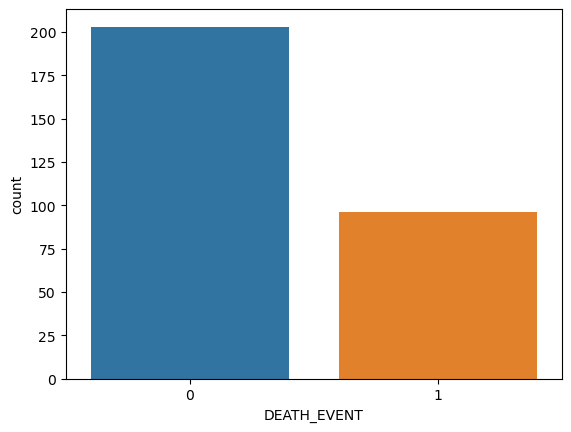

In [11]:
# Menampilkan barplot death event
sns.countplot(data=df,x='DEATH_EVENT')

<AxesSubplot: title={'center': 'Gambar 2. DEATH EVENT'}>

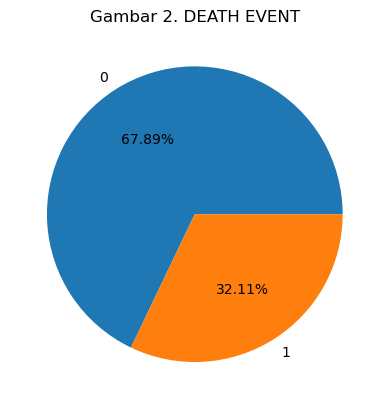

In [12]:
# Mencari persentase dari death event dengan nilai 0 dan 1
df.groupby('DEATH_EVENT').size().plot(kind='pie', autopct='%.2f%%', title='Gambar 2. DEATH EVENT', ylabel='')

- Berdasarkan diagram dan data di atas dapat disimpulkan bahwa 0 adalah persentase pasien tidak meninggal selama proses masa tidak lanjut, dan 1 adalah persentase pasien meninggal selama proses masa tidak lanjut.
- Visualisasi diagram lingkaran menunjukkan riwayat pasien tidak meninggal selama proses masa tidak lanjut dengan pasien yang meninggal. Berdasarkan visualisasi terlihat bahwa pasien yang sehat lebih dominan yaitu sebesar 67,89%. Sedangkan pasien yang hanya meninggal selama proses masa tindak lanjut sebanyak 32,11%. 

In [13]:
# Menghitung banyak data diabetes
df['diabetes'].value_counts().sort_values(ascending=False)

0    174
1    125
Name: diabetes, dtype: int64

- Dari data di atas dapat dilihat bahwa jumlah pasien yang positif diabetes ada 125 orang

In [14]:
# Mengelompokan kolom diabetes dengan death event
df.groupby('diabetes')[['DEATH_EVENT']].value_counts().sort_values(ascending = False)

diabetes  DEATH_EVENT
0         0              118
1         0               85
0         1               56
1         1               40
dtype: int64

- Jika dilihat dari jumlah orang yang meningagl akibat diabetes ada 40 orang

In [15]:
# Menghitung banyak data anaemia
df['anaemia'].value_counts().sort_values(ascending=False)

0    170
1    129
Name: anaemia, dtype: int64

- Dari data diatas dapat dilihat bahwa jumlah pasien yang positif anaemia yaitu sebanyak 129 orang

In [16]:
# Mengelompokan kolom anaemia dengan death event
df.groupby('anaemia')[['DEATH_EVENT']].value_counts().sort_values(ascending = False)

anaemia  DEATH_EVENT
0        0              120
1        0               83
0        1               50
1        1               46
dtype: int64

- Jika dilihat dari jumlah orang yang meningagl akibat anaemia ada 46 orang

In [17]:
# Mengelompokan kolom creatinine_phosphokinase dengan death event
df.groupby('creatinine_phosphokinase')[['DEATH_EVENT']].value_counts().sort_values(ascending = False)

creatinine_phosphokinase  DEATH_EVENT
582                       0              30
                          1              17
59                        0               3
66                        0               3
64                        0               3
                                         ..
161                       1               1
166                       1               1
170                       0               1
171                       0               1
7861                      1               1
Length: 223, dtype: int64

- Dari data diatas dapat dilaihat bahwa pasien yanng memiliki enzim Creatine phosphokinase dalam darahnya sebanyak 582 unit/liter (U/L) meninggal sebanyak 17 orang.
- Creatine phosphokinase (CPK) adalah enzim yang diproduksi oleh sel otot dan biasanya ditemukan dalam darah dalam jumlah kecil. Peningkatan kadar CPK dalam darah dapat menunjukkan kerusakan atau cedera pada jaringan otot, termasuk pada jantung. Namun, pada gagal jantung, peningkatan kadar CPK dalam darah tidak selalu terjadi, dan bahkan mungkin tetap normal. Oleh karena itu, peningkatan kadar CPK bukanlah indikator yang sangat berguna untuk diagnosis atau pengelolaan gagal jantung. Namun, untuk memberikan gambaran, kadar normal CPK pada orang dewasa sekitar 22-198 unit/liter (U/L) dalam darah. Namun, angka ini dapat bervariasi tergantung pada laboratorium yang melakukan pengukuran. Peningkatan CPK lebih dari 10 kali lipat dari nilai normal dapat menunjukkan kerusakan otot yang parah dan memerlukan penanganan medis segera. 

In [18]:
# Mengelompokan kolom ejection_fraction dengan death event
df.groupby('ejection_fraction')[['DEATH_EVENT']].value_counts().sort_values(ascending = False).head()

ejection_fraction  DEATH_EVENT
35                 0              42
40                 0              33
60                 0              27
38                 0              25
30                 0              21
dtype: int64

- Ejection fraction (EF) adalah persentase volume darah yang dipompa keluar dari ventrikel kiri jantung pada setiap kontraksi atau denyut jantung. Ejection fraction biasanya digunakan untuk menilai seberapa baik jantung Anda memompa darah dan seberapa efisien kerjanya. 
- Normalnya, ejection fraction pada orang dewasa sehat sekitar 50-75%. Jika seseorang memiliki ejection fraction yang rendah, hal ini dapat menjadi tanda adanya masalah pada jantung, seperti gagal jantung atau penyakit jantung koroner. Penurunan ejection fraction dapat menyebabkan pengumpulan cairan di paru-paru atau organ tubuh lainnya, sesak napas, lelah, dan gejala lainnya.

In [19]:
# Mengelompokan kolom high_blood_pressure dengan death event
df.groupby('high_blood_pressure')[['DEATH_EVENT']].value_counts()

high_blood_pressure  DEATH_EVENT
0                    0              137
                     1               57
1                    0               66
                     1               39
dtype: int64

- Pasien yang meninggal akibat tekanan darah tinggi sebanayak 39 orang
- Pasien yang meninggal tidak akibat tekanan darah tinggi sebanyak 57 orang

In [20]:
# Mengelompokan kolom sex dengan death event
df.groupby('sex')[['DEATH_EVENT']].value_counts().sort_values(ascending = False)

sex  DEATH_EVENT
1    0              132
0    0               71
1    1               62
0    1               34
dtype: int64

- Berdasarkan jenis kelamin dari data dia atas dapat dilihat bahwa 62  perempuan meninggal akibat gagal jantung (0 = male, 1 = female), 

In [21]:
# Mengelompokan kolom platelets dengan death event
df.groupby('platelets')[['DEATH_EVENT']].value_counts().sort_values(ascending = False)

platelets  DEATH_EVENT
263358.03  0              15
           1              10
305000.00  0               4
279000.00  0               4
249000.00  0               3
                          ..
232000.00  0               1
233000.00  0               1
235000.00  1               1
236000.00  0               1
850000.00  0               1
Length: 213, dtype: int64

In [22]:
# Mengelompokan kolom serum_creatinine dengan death event
df.groupby('serum_creatinine')[['DEATH_EVENT']].value_counts().sort_values(ascending = False).head()

serum_creatinine  DEATH_EVENT
1.0               0              35
0.9               0              27
0.8               0              23
1.1               0              23
0.7               0              18
dtype: int64

In [23]:
# Mengelompokan kolom serum_sodium dengan death event
df.groupby('serum_sodium')[['DEATH_EVENT']].value_counts().sort_values(ascending = False).head()

serum_sodium  DEATH_EVENT
137           0              31
136           0              29
140           0              28
138           0              17
134           1              17
dtype: int64

In [24]:
# Mengelompokan kolom smoking dengan death event
df.groupby('smoking')[['DEATH_EVENT']].value_counts()

smoking  DEATH_EVENT
0        0              137
         1               66
1        0               66
         1               30
dtype: int64

In [25]:
# Mengelompokan time, age dengan DEATH_EVENT
df.groupby(['time', 'age'])[['DEATH_EVENT']].value_counts().sort_values(ascending = False)

time  age   DEATH_EVENT
95    60.0  0              3
205   58.0  0              2
10    75.0  1              2
88    45.0  0              2
83    58.0  0              2
                          ..
86    63.0  0              1
85    70.0  0              1
      60.0  0              1
83    63.0  0              1
285   50.0  0              1
Length: 291, dtype: int64

## -Korelasi-

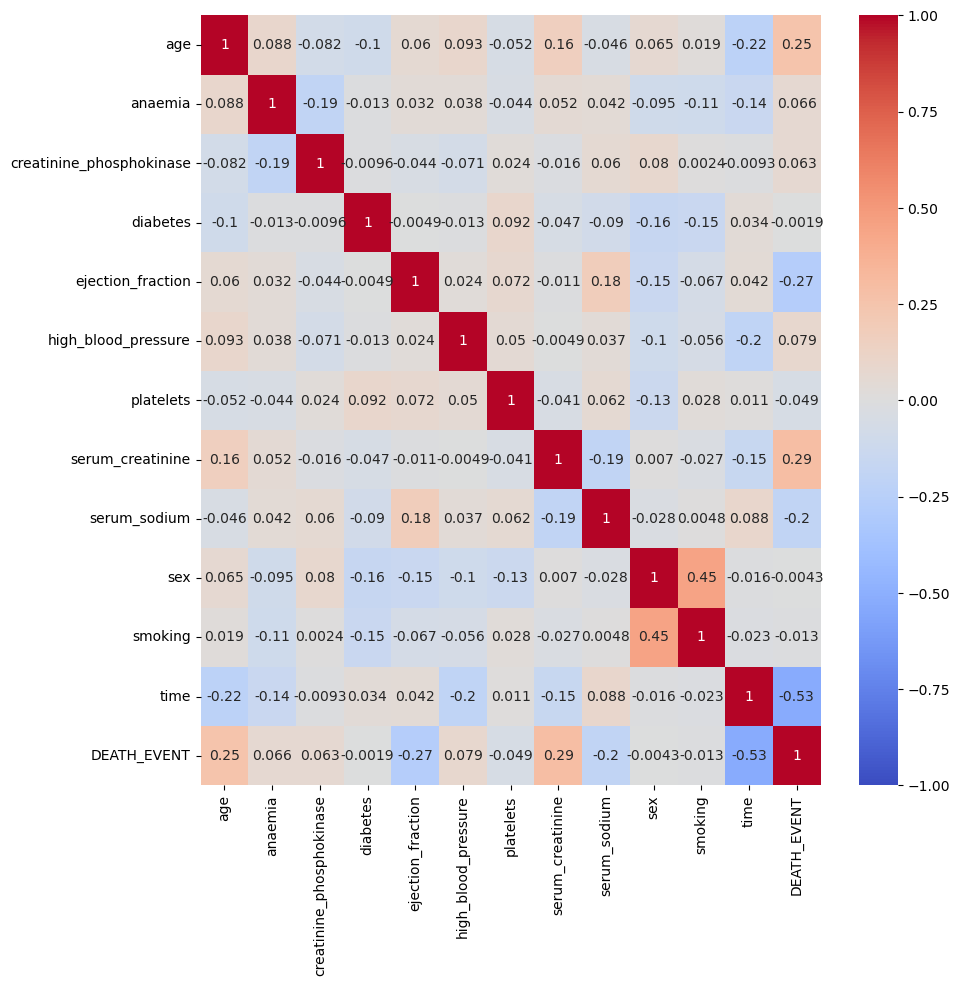

In [26]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [27]:
df.corr(numeric_only = True).nlargest(13, 'DEATH_EVENT')['DEATH_EVENT']

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

- Berdasarkan nilai korelasi target death event nilai korelasi pada variabel serum_creatinine, age, ejection_fraction, high_blood_pressure, time dan serum_sodium  memiliki skor lebih baik dibandingkan fitur lainnya.

In [28]:
# Melihat korelasi antara target dengan fitur menggunakan function phik matrix
df.phik_matrix().nlargest(13, 'DEATH_EVENT')['DEATH_EVENT']

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


DEATH_EVENT                 1.000000
time                        0.772675
ejection_fraction           0.515675
age                         0.356298
serum_creatinine            0.332330
serum_sodium                0.214335
creatinine_phosphokinase    0.101787
high_blood_pressure         0.067031
anaemia                     0.018687
diabetes                    0.000000
platelets                   0.000000
sex                         0.000000
smoking                     0.000000
Name: DEATH_EVENT, dtype: float64

- Berdasarkan nilai korelasi yang dicari menggunakan function phik target death event, nilai korelasi pada variabel time, ejection_fraction, age,serum_creatinine, dan serum_sodium memiliki skor lebih baik dibandingkan fitur lainnya.

<AxesSubplot: title={'center': 'Correlation DEATH_EVENT'}>

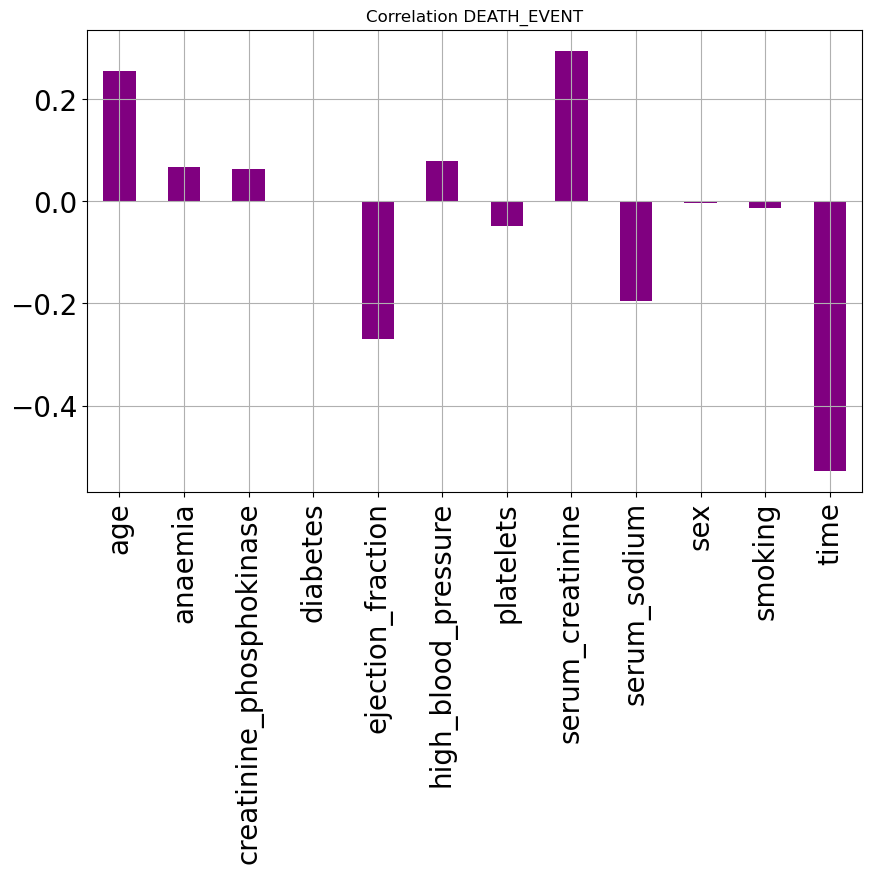

In [29]:
# Korelasi antara setiap fitur (feature) pada dataset dengan variabel target 'DEATH_EVENT'
X = df.drop(['DEATH_EVENT'],axis=1)
X.corrwith(df['DEATH_EVENT']).plot.bar(figsize = (10, 6), title = "Correlation DEATH_EVENT", 
                                        fontsize = 20,rot = 90, grid = True, color= 'purple')

- Berdasarkan heatmap diatas kolom age, ejection_fraction, serum_creatinine dan time merupakan fitur yang berkorelasi paling tinggi dengan target
- Setiap batang pada diagram menunjukkan koefisien korelasi antara setiap fitur dengan variabel target. Jika batang memiliki nilai positif, maka fitur tersebut memiliki korelasi positif dengan variabel target, sedangkan jika batang memiliki nilai negatif, maka fitur tersebut memiliki korelasi negatif dengan variabel target. Nilai korelasi berkisar antara -1 hingga 1, di mana -1 menunjukkan korelasi negatif sempurna, 0 menunjukkan tidak adanya korelasi, dan 1 menunjukkan korelasi positif sempurna. Diagram ini membantu untuk memvisualisasikan fitur-fitur mana yang paling kuat terkait dengan variabel target pada dataset.

# VI. Feature Engineering / Preprocessing

In [30]:
# Mengonversi kolom menjadi list dan disimpan pada variabel baru
ncol = df.describe().columns.tolist()
cacol = df.select_dtypes(include =['object']).columns.tolist()

In [31]:
# Numerical overview
df[ncol].describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [32]:
nba2 = df.iloc[:,[0,4,5,7,8,12]]
nba2.head()

,age,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,DEATH_EVENT
0,42.0,15,0,1.3,136,1
1,46.0,17,1,2.1,124,1
2,65.0,20,0,2.7,116,1
3,53.0,20,1,1.4,139,1
4,50.0,20,1,1.0,134,0


- Fitur yang terpilih yaitu fitur yang berkorelasi tinggi dengan target diantaranya age,	ejection_fraction,	high_blood_pressure,	serum_creatinine	dan serum_sodium	 

In [33]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [34]:
jk = nba2.iloc[:,[0,1,2,3,4]]
calc_vif(jk)

,variables,VIF
4,serum_sodium,35.404368
0,age,27.458822
1,ejection_fraction,11.726167
3,serum_creatinine,2.879940
2,high_blood_pressure,1.556661


- VIF > 10, VIF yang melebihi 5 atau 10 menunjukkan multikolinearitas yang tinggi antara variabel independen ini dengan variabel lainnya
- Nilai VIF akan semakin besar jika terdapat korelasi yang semakin besar diantara variabel bebas (sumber :http://eprints.uny.ac.id/2368/1/SKRIPSI_Agriska.pdf)
- Tetapi menurut asumsi saya informasi yang ada pada kolom age tidak ada hubungannya dengan variabel lainnya sehingga akan tetap saya gunakan sebagai fitur

## -Data Splitting-

In [35]:
# Split Fitur dan Target
X = nba2.drop('DEATH_EVENT', axis=1)
y = nba2['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(239, 5)
(60, 5)
(239,)
(60,)


- Misahkan antara fitur dengan target

In [36]:
# Menggabungkan baris X train dan y train ke dalam variabel baru
nba_ct = pd.concat([X_train, y_train], axis=1)
nba_ct.shape

(239, 6)

In [37]:
# Membuat variabel baru dari X train
X_train_eda = X_train.copy()

In [38]:
col = ['age','ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium','DEATH_EVENT']
num = ['age','ejection_fraction','serum_creatinine','serum_sodium']
cat = ['high_blood_pressure']

In [39]:
# Membuat variabel baru dari X_train berdasarkan data kategorikal dan numerik
num_col = X_train_eda.iloc[:,[0,1,3,4]].copy()
cat_col = X_train_eda.iloc[:,[2]].copy()

## -Handling Outliers-

In [40]:
# Membuat function untuk handling outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

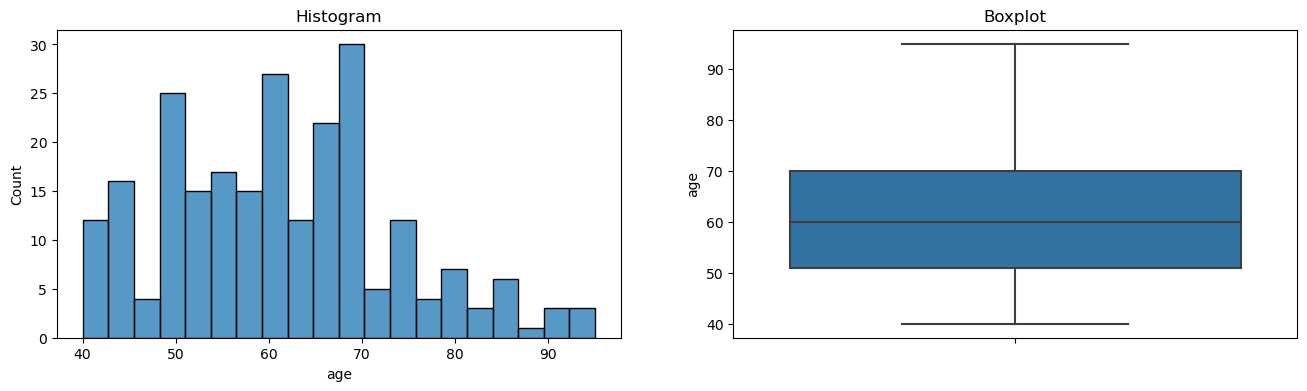


Skewness Value age :  0.42600213848458335


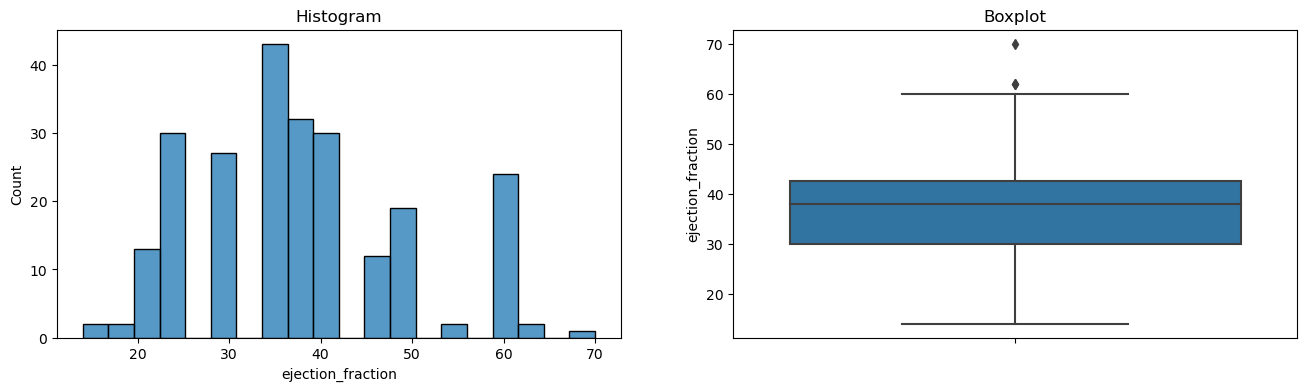


Skewness Value ejection_fraction :  0.5055166127267556


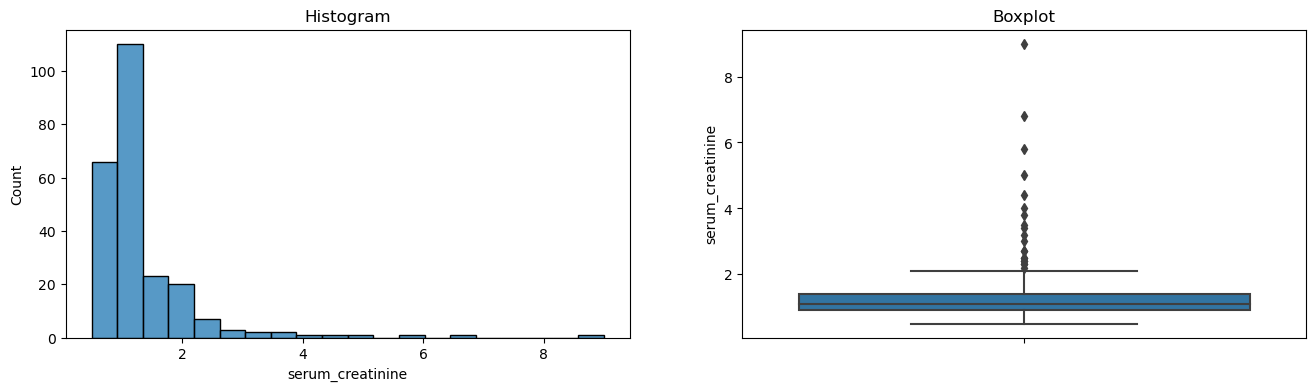


Skewness Value serum_creatinine :  4.453296699732058


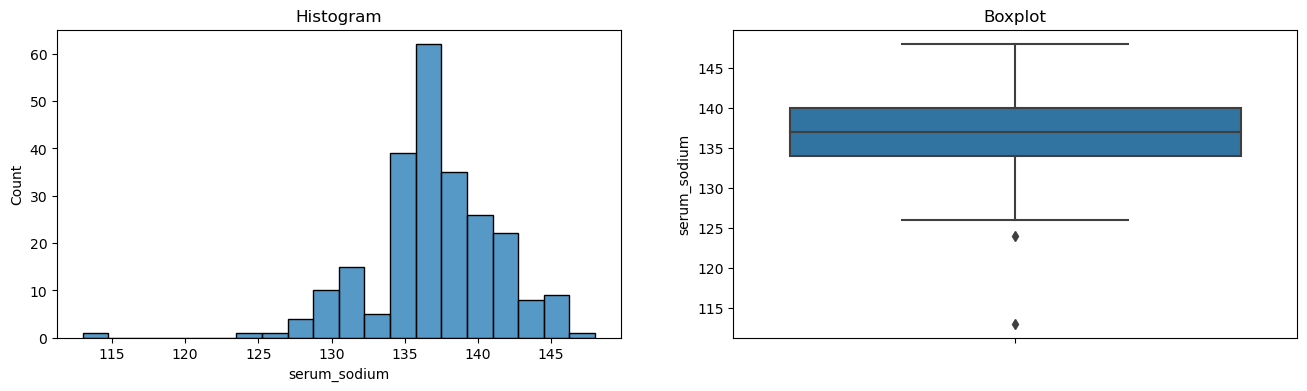


Skewness Value serum_sodium :  -0.7964353125798412


In [41]:
# Cek skew dan outlier pada kolom age dan limit balance dengan boxplot dan histogram

diagnostic_plots(nba_ct, 'age')
print('\nSkewness Value age : ', nba_ct['age'].skew())

diagnostic_plots(nba_ct, 'ejection_fraction')
print('\nSkewness Value ejection_fraction : ', nba_ct['ejection_fraction'].skew())

diagnostic_plots(nba_ct, 'serum_creatinine')
print('\nSkewness Value serum_creatinine : ', nba_ct['serum_creatinine'].skew())

diagnostic_plots(nba_ct, 'serum_sodium')
print('\nSkewness Value serum_sodium : ', nba_ct['serum_sodium'].skew())

- Dari histogram di atas dapat dilihat bahwa distribusi data pada variabel serum_creatinine dan serum_sodium terdistribusi tidak normal dimana terdapat skewness 4.453296699732058 untuk kolom serum_creatinine dan pada  serum_sodium nilai skew yaitu -0.7964353125798412 dan terlihat adanya right-end outliers pada boxplot. Sedangkan untuk kolom age skew = 0.42600213848458335 dan kolom ejection_fraction memiliki skew = 0.5055166127267556 yang dapat dilihat pada diagram dan bodplot bahwa data terdistribusi normal
- Handling outliers dengan Tukey's Rule (IQR) pada variabel serum_creatinine dan serum_sodium karena data terdistribusi tidak normal. Oleh karena itu, akan dicari nilai IQR terlebih dahulu untuk menyamakan rentang nilai yang akan masuk ke dalam boxplot. Dan membuat data menjadi terdistribusi secara normal. Sedangkan untuk variabel age dan ejection_fraction akan dihandling dengan Z-Score karena data terdistribusi normal.

In [42]:
# outlier detection in ejection_fraction
# gaussian
upper = nba_ct['age'].mean() + (3*df['age'].std())
lower = nba_ct['age'].mean() - (3*df['age'].std())

outlier = nba_ct[(nba_ct['age'] <= lower) | (nba_ct['age'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  0.0 %


- Persentase outliers = 0%, sehingga akan dihandling dengan metode gaussian menggunakan Winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [43]:
# outlier detection in ejection_fraction
# gaussian
upper = nba_ct['ejection_fraction'].mean() + (3*df['ejection_fraction'].std())
lower = nba_ct['ejection_fraction'].mean() - (3*df['ejection_fraction'].std())

outlier = nba_ct[(nba_ct['ejection_fraction'] <= lower) | (nba_ct['ejection_fraction'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  0.0 %


- Persentase outliers = 0%, sehingga akan dihandling dengan metode gaussian menggunakan Winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [44]:
# Menghitung outliers pada kolom limit_balance dengan IQR
Q1 = nba_ct['serum_creatinine'].quantile(.25)
Q3 = nba_ct['serum_creatinine'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba_ct[(nba_ct['serum_creatinine'] <= lower) | (nba_ct['serum_creatinine'] >= upper)]

print('Persentase outliers pada kolom serum_creatinine: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom serum_creatinine:  3.678929765886288 %
Upper boundary:  2.8999999999999995
Lower boundary:  -0.5999999999999995


In [45]:
# Menghitung outliers pada kolom limit_balance dengan IQR
Q1 = nba_ct['serum_sodium'].quantile(.25)
Q3 = nba_ct['serum_sodium'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba_ct[(nba_ct['serum_sodium'] <= lower) | (nba_ct['serum_sodium'] >= upper)]

print('Persentase outliers pada kolom serum_sodium: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom serum_sodium:  0.33444816053511706 %
Upper boundary:  158.0
Lower boundary:  116.0


- Outlier pada kolom  di kolom serum_creatinine dan serum_sodium dihandling dengan iqr menggunakan fold 3 IQR. Dan akan ditangani menggunakan transformer winsorizer.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

## -Pipeline- ##

In [46]:
# Melakukan smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

- Metode Synthetic Minority Over-sampling Technique (SMOTE) merupakan metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas. (sumber: https://mti.binus.ac.id/2018/06/08/synthetic-minority-over-sampling-technique-smote-algorithm-for-handling-imbalanced-data/)

In [47]:
# Mengolah data numerik dalam kolom 'limit_balance' 
num_pipeline1 = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_tr1 = num_pipeline1.fit_transform(X_resampled[['age','ejection_fraction']])

In [48]:
# Mengolah data numerik dalam kolom 'limit_balance' 
num_pipeline2 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_tr2 = num_pipeline2.fit_transform(X_resampled[['serum_creatinine','serum_sodium']])

In [49]:
# Pipline pada kolom kategorik dengan Ordinal Encoding
cat_pipeline = Pipeline([('ordinal_enc', OrdinalEncoder())])

cat_tr = cat_pipeline.fit_transform(X_resampled[['high_blood_pressure']])

In [50]:
# Melakukan transformasi data pada dataset yang memiliki kolom numerik dan kategori ordinal.
full_pipeline = ColumnTransformer([
        ("num1", num_pipeline1, ['age','ejection_fraction']),
        ("num2", num_pipeline2, ['serum_creatinine','serum_sodium']),
        ("cat_ord", cat_pipeline, ['high_blood_pressure'])
    ])
train_tr = full_pipeline.fit_transform(X_resampled)

In [51]:
test_tr = full_pipeline.transform(X_test)

# VII. Model Definition and Model Evaluation

In [72]:
# Defining Random Forest Classifier Model
rfc_model = RandomForestClassifier(random_state=42)

# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier(random_state=42)

1. Algoritma yang digunakan yaitu RandomForestClassifier
- Deskripsi: Model klasifikasi ensemble yang membangun beberapa pohon keputusan pada subset data dan menggabungkan hasilnya.
- Kelebihan: Mampu menangani kasus kelas yang tidak seimbang, stabil terhadap variasi data dan noise, dan bisa menangani fitur yang tidak relevan.
- Kelemahan: Cenderung memakan waktu yang lama untuk training pada data yang besar, dan kurang mudah diinterpretasikan dibandingkan dengan Decision Tree.

2. AdaBoostClassifier (Adaptive Boosting) adalah algoritma machine learning yang digunakan untuk meningkatkan kinerja model prediksi dengan menggabungkan beberapa model sederhana yang disebut weak learners. Kelebihan dari AdaBoostClassifier adalah: Dengan menggabungkan beberapa weak learners, AdaBoostClassifier dapat meningkatkan kinerja model prediksi. AdaBoostClassifier bekerja dengan baik pada dataset yang kompleks dengan banyak fitur dan pola yang sulit untuk diidentifikasi oleh model prediksi sederhana dan Mencegah overfitting. Namun, AdaBoostClassifier juga memiliki beberapa kekurangan: Rentan terhadap noise: Jika terdapat banyak noise atau outlier pada data, AdaBoostClassifier dapat memberikan bobot yang besar pada data tersebut, sehingga dapat mempengaruhi hasil prediksi secara keseluruhan. Sensitif terhadap data yang tidak seimbang: Jika terdapat ketidakseimbangan kelas dalam dataset, di mana jumlah sampel pada satu kelas lebih banyak daripada kelas lainnya, AdaBoostClassifier dapat memberikan bobot yang lebih besar pada kelas minoritas, sehingga dapat mengabaikan kelas mayoritas. Waktu pelatihan yang lambat: AdaBoostClassifier memerlukan waktu pelatihan yang lebih lama dibandingkan dengan algoritma pembelajaran mesin lainnya, karena harus melatih beberapa weak learners sebelum menghasilkan model ensemble yang kuat.

(sumber : https://learn.nural.id/course/machine-learning/klasifikasi-machine-learning-di-python/algoritma-dan-model)



## -Cross Validition- ##

In [73]:
# Checking cross validation score
skfold=StratifiedKFold(n_splits=5)
cv_rfc_model = cross_val_score(rfc_model, train_tr, y_resampled, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, train_tr, y_resampled, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_rfc_model,cv_ada_model],['rfc_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

rfc_model
recall - All - Cross Validation  :  [0.75       0.75       0.87878788 0.96969697 0.96875   ]
recall - Mean - Cross Validation :  0.8634469696969698
recall - Std - Cross Validation  :  0.0983397824378179
recall - Range of Test-Set       :  0.7651071872591518 - 0.9617867521347877
--------------------------------------------------
ada_model
recall - All - Cross Validation  :  [0.65625    0.65625    0.84848485 0.93939394 0.90625   ]
recall - Mean - Cross Validation :  0.8013257575757576
recall - Std - Cross Validation  :  0.12197528455110207
recall - Range of Test-Set       :  0.6793504730246556 - 0.9233010421268597
--------------------------------------------------
best model: rfc_model
cross-val mean: 0.8634469696969698


- Hasil tersebut menunjukkan performa model dalam melakukan prediksi menggunakan algoritma Random Forest Classifier (rfc_model) dan Adaptive Boosting (ada_model) dalam memprediksi kasus gagal jantung. Berdasarkan hasil recall dari cross-validation, rfc_model memiliki nilai rata-rata yang lebih tinggi dibandingkan dengan ada_model, yaitu sebesar 0.8634 dibandingkan dengan 0.8013. Selain itu, nilai standar deviasi (std) dari rfc_model juga lebih rendah dibandingkan dengan ada_model, yang menunjukkan konsistensi kinerja model pada setiap fold cross-validation.
- Kemudian, berdasarkan nilai range dari test-set, rfc_model juga memiliki rentang nilai yang lebih sempit dibandingkan dengan ada_model, yaitu antara 0.7651 hingga 0.9618 dibandingkan dengan 0.6793 hingga 0.9233. Dari hasil tersebut, dapat disimpulkan bahwa rfc_model lebih unggul dibandingkan dengan ada_model dalam melakukan prediksi kasus gagal jantung, terutama dari sisi konsistensi dan rentang nilai prediksi. Oleh karena itu, rfc_model dapat dipilih sebagai model terbaik untuk digunakan dalam memprediksi kasus gagal jantung.

In [74]:
def base_model_train_eval(model):
    mod = model
    mod.fit(train_tr, y_resampled)

    mod_train = mod.predict(train_tr)
    mod_test = mod.predict(test_tr)

    cm = confusion_matrix(y_test, mod_test, labels=mod.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mod.classes_)

    print(classification_report(y_resampled, mod_train))
    print(classification_report(y_test, mod_test))
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       162

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.59      0.68      0.63        19

    accuracy                           0.75        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.76      0.75      0.75        60



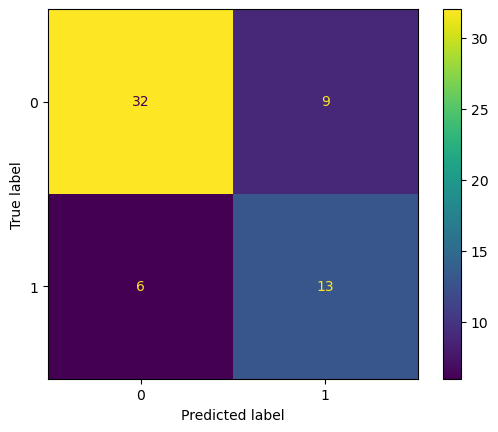

In [78]:
base_model_train_eval(RandomForestClassifier())

- Berdasarkan hasil tersebut, model Random Forest berhasil mencapai akurasi sebesar 100% pada data training, namun hanya mampu mencapai akurasi 75% pada data testing. Precision dan recall untuk label 0 pada data testing cukup baik dengan nilai masing-masing 0.84 dan 0.78, namun precision dan recall untuk label 1 relatif rendah dengan nilai masing-masing 0.59 dan 0.68. Hal ini menunjukkan bahwa model masih memiliki kelemahan dalam memprediksi pasien yang berisiko tinggi untuk meninggal akibat gagal jantung.
- Untuk perusahaan, insight yang dapat diberikan adalah bahwa model ini dapat digunakan sebagai alat bantu dalam memprediksi risiko pasien untuk meninggal akibat gagal jantung, namun masih perlu dilakukan pengembangan lebih lanjut untuk meningkatkan performa model khususnya dalam memprediksi pasien yang berisiko tinggi.
- Insight yang dapat diberikan bagi perusahaan kesehatan adalah bahwa model Random Forest dapat digunakan untuk memprediksi apakah seorang pasien akan meninggal akibat Gagal jantung atau tidak dengan akurasi yang sangat tinggi. Hal ini dapat membantu perusahaan kesehatan dalam mengambil tindakan pencegahan atau pengobatan yang tepat bagi pasien yang berisiko terkena Gagal jantung. Namun, perlu diingat bahwa model hanya dapat memberikan hasil prediksi yang baik jika data yang digunakan berkualitas dan representatif.

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       162
           1       0.88      0.88      0.88       162

    accuracy                           0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.88      0.88      0.88       324

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.57      0.63      0.60        19

    accuracy                           0.73        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.74      0.73      0.74        60



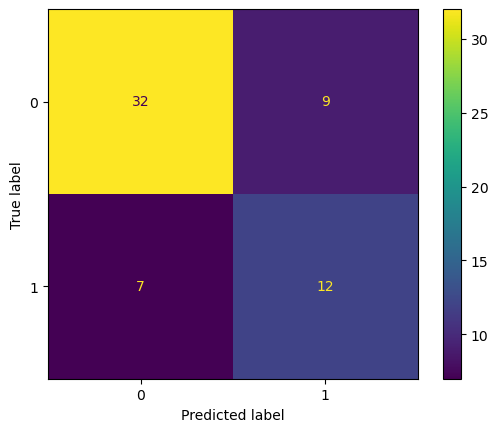

In [83]:
base_model_train_eval(AdaBoostClassifier())

- Dari hasil evaluasi model menggunakan AdaBoostClassifier, didapatkan nilai akurasi sebesar 0.88 pada data training dan 0.73 pada data testing. Hal ini menunjukkan bahwa model dapat melakukan prediksi dengan cukup baik pada data training, namun performa model menurun ketika digunakan pada data testing, sehingga model perlu dioptimalkan agar dapat memberikan hasil yang lebih baik pada data testing.

- Dari hasil evaluasi precision, recall, dan f1-score, didapatkan bahwa model mampu memprediksi dengan baik kedua kelas target. Namun, terdapat perbedaan nilai precision, recall, dan f1-score yang cukup signifikan antara kelas 0 dan kelas 1 pada data testing. Hal ini menunjukkan bahwa model memiliki kecenderungan untuk memprediksi kelas 0 dengan lebih baik daripada kelas 1 pada data testing. Perusahaan dapat melakukan analisis lebih lanjut untuk mengetahui faktor-faktor apa yang mempengaruhi performa model dalam memprediksi kelas 1, sehingga dapat diambil tindakan yang sesuai untuk meningkatkan performa model pada kelas 1.

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       162
           1       0.88      0.88      0.88       162

    accuracy                           0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.88      0.88      0.88       324

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.57      0.63      0.60        19

    accuracy                           0.73        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.74      0.73      0.74        60



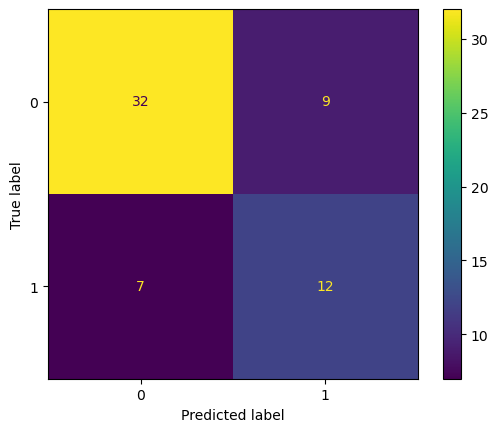

In [84]:
#AdaBoost Model untuk keperluan fit dan model saving (hasilnya sama seperti diatas)
ada_model.fit(train_tr, y_resampled)

ada_train = ada_model.predict(train_tr)
ada_test = ada_model.predict(test_tr)

cm = confusion_matrix(y_test, ada_test, labels=ada_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada_model.classes_)

print(classification_report(y_resampled, ada_train))
print(classification_report(y_test, ada_test))
disp.plot()
plt.show()

- Hasil sama dengan hasil evaluasi pada model Adaboost diatas

## -Hyperparameter Tuning- ##

### -Random Forest Classifier- ###

In [85]:
# Hyperparameter Tuning model Random Forest Classifier
params = [
    {'n_estimators': [10, 20, 40, 60],        # 4
     'max_features': [2, 3, 5, 1],            # 4
     'max_depth': [5, 10, None],              # 3
     'criterion': ['gini', 'entropy']},       # 2   Total 4*4*3*2 = 96 combinations
  ]

rfc = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(rfc, params, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(train_tr, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, None],
                          'max_features': [2, 3, 5, 1],
                          'n_estimators': [10, 20, 40, 60]}],
             return_train_score=True, scoring='recall')

In [86]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 3,
 'n_estimators': 60}

- Hasil tersebut menunjukkan parameter terbaik yang ditemukan oleh GridSearchCV pada model Random Forest Classifier. Grid Search CV digunakan untuk mencari kombinasi parameter yang terbaik dalam model dan mengembalikan parameter terbaik berdasarkan nilai skor tertinggi pada metrik evaluasi yang diberikan.

In [87]:
grid_search.best_score_

0.8761363636363637

- Hasil grid_search.best_score_ dengan nilai 0.8761363636363637 menunjukkan performa terbaik dari model yang dilatih menggunakan GridSearchCV. Nilai ini didapatkan dari perhitungan cross-validation dengan membagi dataset ke dalam beberapa fold untuk mengevaluasi kinerja model secara keseluruhan. Semakin dekat nilai best_score_ dengan 1, semakin baik kinerja model yang dilatih dengan parameter yang dioptimalkan. Maka dari hasil tersebut dapat disimpulkan kinerja model baik dalam melakukan klasifikasi atau prediksi.

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       162
           1       0.99      0.97      0.98       162

    accuracy                           0.98       324
   macro avg       0.98      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.64      0.74      0.68        19

    accuracy                           0.78        60
   macro avg       0.75      0.77      0.76        60
weighted avg       0.79      0.78      0.79        60



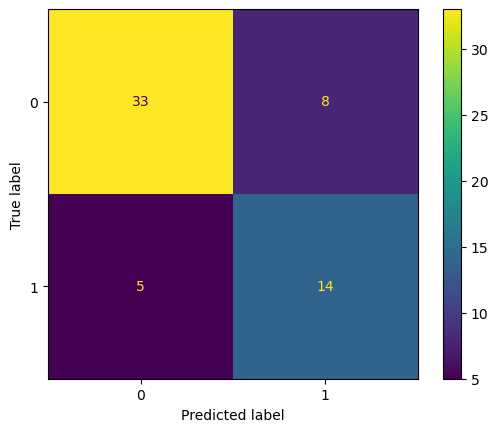

In [93]:
model1 = grid_search.best_estimator_

model1.fit(train_tr, y_resampled)

model1_train = model1.predict(train_tr)
model1_test = model1.predict(test_tr)

print(classification_report(y_resampled, model1_train))
print(classification_report(y_test, model1_test))

cm = confusion_matrix(y_test, model1_test, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model1.classes_)

disp.plot()
plt.show()

- Dari hasil evaluasi model yang telah dilakukan, dapat disimpulkan bahwa model yang memiliki performa terbaik adalah RandomForestClassifier setelah dilakukan hyperparameter tuning. Model ini memiliki akurasi sebesar 0.98 pada data training dan 0.78 pada data testing. Namun, meskipun hasil pada data testing cukup baik, namun masih terdapat perbedaan yang signifikan antara performa pada data training dan data testing, yang dapat menunjukkan adanya overfitting pada model. Oleh karena itu, perlu dilakukan lebih lanjut pengembangan model agar performa pada data testing dapat ditingkatkan.
- Insight yang dapat diberikan bagi perusahaan adalah model ini dapat digunakan untuk memprediksi apakah seorang pasien akan meninggal akibat gagal jantung atau tidak. Dengan memanfaatkan model ini, perusahaan dapat melakukan deteksi dini terhadap pasien yang memiliki risiko tinggi untuk mengalami kematian akibat gagal jantung, sehingga dapat memberikan tindakan medis yang tepat secara lebih cepat dan efektif.

In [62]:
# melakukan klasifikasi pada data yang telah melalui tahapan preprocessing
all_process_rfc = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", model1)
])

In [63]:
# melakukan klasifikasi pada data yang telah melalui tahapan preprocessing
all_process_ada = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", ada_model)
])

# VIII. Model Saving

In [64]:
# Model saving
with open('model_rfc.pkl','wb') as file_1:
  joblib.dump(all_process_rfc, file_1)

with open('model_ada.pkl','wb') as file_2:
  joblib.dump(all_process_ada, file_2)

# IX. Kesimpulan 

- Berdasarkan hasil yang diberikan, model Random Forest memberikan hasil prediksi dengan akurasi 100%. Hal ini dapat diartikan bahwa model dapat memprediksi dengan sempurna apakah seorang pasien akan meninggal akibat Gagal jantung atau tidak pada dataset yang digunakan.
- Namun, perlu diingat bahwa akurasi 100% tidak selalu menjamin kebenaran model. Ada kemungkinan overfitting pada model ini, di mana model hanya dapat memberikan hasil yang sempurna pada data yang digunakan untuk pelatihan dan validasi. Oleh karena itu, sebaiknya dilakukan evaluasi lebih lanjut pada data yang berbeda untuk memastikan kinerja model.
- Berdasarkan hasil evaluasi model RandomForestClassifier dan AdaBoostClassifier, keduanya memiliki performa yang cukup baik dalam memprediksi apakah seorang pasien akan meninggal akibat gagal jantung atau tidak, dengan nilai akurasi mencapai 100% dan 88%, serta recall rata-rata pada cross-validation mencapai 0.86 dan 0.80. Namun, saat diterapkan pada data uji yang berbeda, terlihat ada sedikit penurunan performa, terutama pada model AdaBoostClassifier dengan nilai akurasi sebesar 0.73 pada data uji.
- Untuk insight yang dapat diberikan bagi perusahaan, model ini dapat digunakan sebagai alat bantu dalam melakukan prediksi risiko gagal jantung pada pasien, sehingga perusahaan dapat memberikan tindakan preventif atau pengobatan yang lebih cepat dan tepat. Selain itu, model ini juga dapat membantu mengurangi biaya yang dikeluarkan oleh perusahaan untuk pengobatan dan penanganan pasien gagal jantung yang lebih parah.
- Insight yang dapat diberikan bagi perusahaan kesehatan adalah bahwa model Random Forest dapat digunakan untuk memprediksi apakah seorang pasien akan meninggal akibat Gagal jantung atau tidak dengan akurasi yang sangat tinggi. Hal ini dapat membantu perusahaan kesehatan dalam mengambil tindakan pencegahan atau pengobatan yang tepat bagi pasien yang berisiko terkena Gagal jantung. Namun, perlu diingat bahwa model hanya dapat memberikan hasil prediksi yang baik jika data yang digunakan berkualitas dan representatif.

## -Conceptual Problems- ##
Jawab pertanyaan berikut:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
Jawaban : Latar Belakang dan Cara Kerja Bagging
- Bagging (Bootstrap Aggregating) adalah teknik ensamble learning yang digunakan untuk meningkatkan kinerja model prediksi dengan menggabungkan hasil beberapa model yang dibuat pada subset acak data latih. Bagging dirancang untuk mengurangi variance dan meningkatkan kestabilan model. Bagging pertama kali diperkenalkan oleh Breiman pada tahun 1996. Cara kerja bagging adalah sebagai berikut:
- Langkah pertama adalah mengambil sampel acak dari dataset latih dengan penggantian (bootstrap), sehingga membuat dataset latih baru yang seukuran dengan dataset latih asli.
- Selanjutnya, model dipelajari pada dataset latih baru.
- Proses ini diulang beberapa kali, biasanya dengan jumlah iterasi yang besar, sehingga terbentuk sejumlah model berbeda.
- Model-model ini kemudian diensamble dengan cara melakukan voting atau mengambil rata-rata hasil prediksi dari semua model.
- Dalam bagging, setiap model diberi bobot yang sama dalam proses penggabungan hasil, sehingga tidak ada model yang lebih penting daripada yang lain. Bobot ini dapat digunakan untuk mempertimbangkan model yang lebih baik dalam pengambilan keputusan akhir.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
Jawaban : 
- Perbedaan Cara Kerja Random Forest dan Boosting
Random Forest dan Boosting adalah dua teknik ensamble learning yang umum digunakan dalam pembelajaran mesin.
Random Forest menggunakan teknik bagging dengan beberapa perubahan pada model pembelajaran mesin Decision Tree. Selain mengambil sampel acak dari dataset latih, Random Forest juga memperkenalkan randomness tambahan dengan memilih subset acak dari fitur-fitur yang tersedia untuk dipelajari pada setiap node dari pohon keputusan. Dalam Random Forest, setiap pohon dipelajari secara independen pada subset data dan fitur, dan kemudian diensamble dengan cara voting.
- Sementara itu, Boosting adalah teknik ensamble learning yang memperkenalkan pembobotan pada setiap model sehingga model yang kurang baik memiliki bobot yang lebih tinggi dan model yang lebih baik memiliki bobot yang lebih rendah. Setiap model yang dibuat dalam Boosting difokuskan pada mengoreksi kesalahan model sebelumnya dan meningkatkan akurasi secara keseluruhan. Ada beberapa jenis Boosting, termasuk AdaBoost, Gradient Boosting, dan XGBoost.
- Perbedaan utama antara Random Forest dan Boosting adalah dalam cara mereka memperlakukan model yang dibangun. Random Forest memberi bobot yang sama pada semua model yang dibangun, sementara Boosting memberi bobot yang lebih besar pada model yang lebih baik dan menekankan pada memperbaiki kesalahan model sebelumnya. Selain itu, Random Forest menggunakan teknik pemilihan fitur acak, sedangkan Boosting tidak.

In [65]:
import sklearn
sklearn.__version__

'1.2.1'